# Integration and Visualization
- YOUR NAME: Kevin Schönhage
- YOUR VUNetID: OMN496

(If you do not provide your NAME and VUNetID we will not accept your submission.)

**To hand in: one zip file, containing...**
- this file, with completed tasks
- the ontology you made in the previous assignment (Task 1)
- an ontology you found on the web (Task 1)
- an integrated ontology (`mapping.ttl`) (Task 1)

## Task 1 (20 Points):  Integrating ontologies in Protégé
Take the ontology you built for Module 4 (let’s call it ontology A), and find either a fellow student with a similar ontology or an ontology on the web on similar domain. That will be our ontology B. 

Create an empty ontology in Protégé (ontology C), and import both ontologies. 

Define at least 6 mappings as following:

-    1 mapping between a class from A and a class from B using rdfs:subClassOf 
-    1 mapping between a class from A and a class from B using owl:equivalentClass
-    1 mapping between a property from A and a property from B using rdfs:subPropertyOf
-    1 mapping between a property from A and a property from B using either owl:equivalentProperty, owl:disjointProperty, owl:inverseOf, or owl:propertyChainAxiom
-    1 mapping between an individual from A and an individual from B using owl:differentFrom
-    1 mapping between an individual from A and an individual from B using owl:sameAs 

The combined ontology should be **consistent**.

Save the ontology as Turtle, where the filename is ‘`mapping.ttl`’

**Submit all three ontologies together with this assignment, leaving preserved the original file names of the ontologies**

In [27]:
print(open('mapping.ttl').read())

FileNotFoundError: [Errno 2] No such file or directory: 'mapping.ttl'

## Task 2 (10 Points):  Explain your mapping

Please explain and motivate the mapping you made in the previous question in a few sentences in the text field below :

I created a new ontology mapping.ttl which integrates my VU ontology (A) with the W3C ORG and FOAF vocabularies (B).
I defined six mappings:

• vu:Lecturer rdfs:subClassOf foaf:Person

• vu:Department owl:equivalentClass org:OrganizationalUnit

• vu:partOf rdfs:subPropertyOf org:subOrganizationOf

• vu:belongsTo owl:inverseOf org:hasUnit

• vu:DrSmith owl:sameAs vu:DrJones

• vu:VU owl:differentFrom vu:UvA

After running the HermiT reasoner, the ontology was consistent.
The mappings successfully connect semantically related classes, properties, and individuals across the ontologies.

## Task 3 (20 points). From SPARQL to DataFrame

For the next few tasks we are going to store the results from our queries in a [Pandas DataFrame](https://pandas.pydata.org), making it easier to perform further data processing on the results. To accomplish this, write a procedure to execute the query and to convert the results into a dataframe. 

To help you on your way, we have already written the main procedure `table_from_query/2` and the helper function `cast/1` which converts the raw values to the appropriate Python objects. Your task is to write the two missing procedures: `execute_query/2` and `create_dataframe/1`. *HINT: revisit assignment 3 if you are unsure where to start*.

Please run the next two cells to import the necessary dependencies and to activate the helper procedures.

In [28]:
from SPARQLWrapper import SPARQLWrapper, JSON
import pandas as pd

In [29]:
def cast(value):
    """ Cast the value from a SPARQL result to an appropriate Python object.
        The expected input is a dictionary with at least the keys 'type' and 'value'.
    """
    v = value['value']
    if value['type'] in ['literal', 'typed-literal'] and 'datatype' in value.keys():
        dtype = URIRef(value['datatype'])
        if any(d in dtype for d in ('integer', 'long', 'int', 'short', 'byte')):
            return int(v)
        if any(d in dtype for d in ('decimal', 'float', 'double')):
            return float(v)

    # fallback to string
    return str(v)

def table_from_query(endpoint, query):
    """ Execute a query on an endpoint and return the results as a dataframe.
    """
    query_results = execute_query(endpoint, query)
    dataframe = create_dataframe(query_results)

    return dataframe

In [30]:
def execute_query(endpoint_url, query):
    sparql = SPARQLWrapper(endpoint_url)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()

def create_dataframe(results):
    cols = results['head']['vars']
    rows = []
    for b in results['results']['bindings']:
        row = []
        for c in cols:
            row.append(cast(b[c]) if c in b else None)   # << hier de juiste binding casten
        rows.append(row)
    return pd.DataFrame(rows, columns=cols)

To test your code, we ask you to create a dataframe about teachers and their course load. We will use the data in `vuDataset.ttl`, which must be imported in GraphDB as a new repository called `repo-vu`. Use the following endpoint and query for this purpose.


In [31]:
sparql_endpoint = "http://DESKTOP-GNHLHJC:7200/repositories/knowledge-data-vu"
sparql_query = """
PREFIX vu: <http://example.org/vu/>

SELECT ?teacher (COUNT(*) as ?courses) {
    ?teacher vu:teaches ?o .
} GROUP BY ?teacher
"""

courseload = table_from_query(sparql_endpoint, sparql_query)
print(courseload)

NameError: name 'URIRef' is not defined

## Task 4 (20 points) - Data visualization

Visualizing (parts of) the data can help us gain a better understanding of what we are dealing with. Now that the data is stored as a dataframe, we can use a library like `matplotlib` to create a variety of helpful plots. To illustrate this, run the following cells to install and import the library, and to generate a pie plot from our dataframe about course loads.

In [37]:
%pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: C:\Users\Kevin\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [38]:
import matplotlib

In [39]:
# Pandas visualization
courseload.set_index('teacher', inplace=True)
courseload['courses'].plot.pie()

NameError: name 'courseload' is not defined

## Task 4a (10 points): Make a horizontal bar chart (with suitable labels and title) from the `courseload` dataframe

There are many different kinds of plots that we can make. Please look at [the Pandas wiki](https://pandas.pydata.org/docs/user_guide/visualization.html) to get an idea on what is possible.

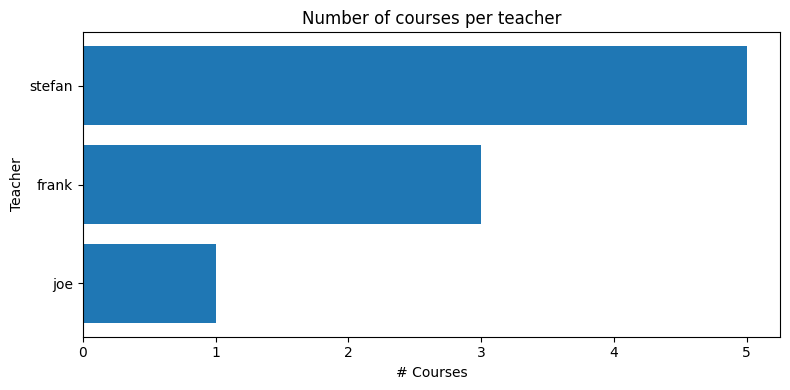

In [42]:
from SPARQLWrapper import SPARQLWrapper, JSON
import pandas as pd
import matplotlib.pyplot as plt

def run_df(endpoint, query):
    s = SPARQLWrapper(endpoint)
    s.setQuery(query)
    s.setReturnFormat(JSON)
    r = s.query().convert()
    cols = r['head']['vars']
    rows = []
    for b in r['results']['bindings']:
        rows.append([b[c]['value'] if c in b else None for c in cols])
    return pd.DataFrame(rows, columns=cols)

# ⬇️ pas dit aan als jouw repo anders heet
sparql_endpoint = "http://DESKTOP-GNHLHJC:7200/repositories/knowledge-data-vu"

sparql_query = """
PREFIX vu: <http://example.org/vu/>
SELECT ?teacher (COUNT(?course) AS ?courses)
WHERE { ?teacher vu:teaches ?course . }
GROUP BY ?teacher
"""

courseload = run_df(sparql_endpoint, sparql_query)

# naar getallen + nette labels
courseload['courses'] = courseload['courses'].astype(int)

def local_name(iri):
    if '#' in iri:  return iri.rsplit('#',1)[1]
    if '/' in iri:  return iri.rsplit('/',1)[1]
    return iri

courseload['teacher_label'] = courseload['teacher'].apply(local_name)
courseload = courseload.sort_values('courses', ascending=True)  # ascending voor barh
courseload


plt.figure(figsize=(8,4))
plt.barh(courseload['teacher_label'], courseload['courses'])
plt.title('Number of courses per teacher')
plt.xlabel('# Courses')
plt.ylabel('Teacher')
plt.tight_layout()
plt.show()

## Task 4b (10 points): Write a new SPARQL query for DBpedia and create an interesting chart from it

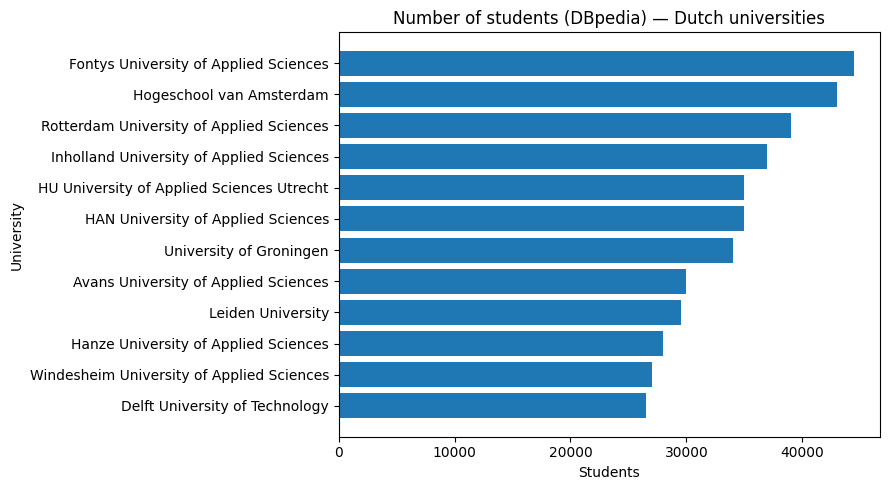

In [44]:
endpoint_dbpedia = "https://dbpedia.org/sparql"

q_dbpedia = """
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX dbr: <http://dbpedia.org/resource/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?univ ?label ?students
WHERE {
  ?univ a dbo:University ;
        dbo:country dbr:Netherlands ;
        dbo:numberOfStudents ?students ;
        rdfs:label ?label .
  FILTER(lang(?label) = 'en')
}
ORDER BY DESC(xsd:integer(?students))
LIMIT 12
"""

uni = run_df(endpoint_dbpedia, q_dbpedia)
# cast naar int en schoon label
uni['students'] = uni['students'].astype(int)
uni = uni.sort_values('students', ascending=True)
uni


plt.figure(figsize=(9,5))
plt.barh(uni['label'], uni['students'])
plt.title('Number of students (DBpedia) — Dutch universities')
plt.xlabel('Students')
plt.ylabel('University')
plt.tight_layout()
plt.show()


## Task 5 (10 points). Conditional styling

Below is a query to find all EU countries and their surface area in $m^2$. Below that is some code that adds some colour to the resulting table.


We ask you to update the query and code below to add a new column that shows the percentage of the country's area that is water.
The background color of this column must depend on this percentage: it should be greener if more of the country is land, and bluer if more of the country is water.

In [52]:
endpoint = "http://dbpedia.org/sparql"

query = """
PREFIX dbo: <http://dbpedia.org/ontology/>
PREFIX dbr: <http://dbpedia.org/resource/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX yago: <http://dbpedia.org/class/yago/>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT DISTINCT ?country ?name ?area_100k_km2 ?areaWater ?water_percent ?giniCoefficient
WHERE {
  ?country a yago:WikicatMemberStatesOfTheEuropeanUnion ;
           dbo:area ?area ;
           rdfs:label ?name .
  OPTIONAL { ?country dbo:areaWater ?areaWater . }
  OPTIONAL { ?country dbo:giniCoefficient ?giniCoefficient . }

  # oppervlakte in 100k km² (zoals in de originele opdracht)
  BIND(ROUND(?area / 100000000000) AS ?area_100k_km2)

  # bereken percentage wateroppervlak
  BIND(
    IF(bound(?areaWater),
       ROUND((?areaWater / ?area) * 100, 2),
       0
    ) AS ?water_percent
  )

  FILTER(LANG(?name) = 'en')
}
ORDER BY DESC(?area_100k_km2)
LIMIT 50
"""

dbpedia_countries = table_from_query(endpoint, query)
dbpedia_countries.head()


QueryBadFormed: QueryBadFormed: A bad request has been sent to the endpoint: probably the SPARQL query is badly formed. 

Response:
b"Virtuoso 37000 Error SP030: SPARQL compiler, line 23: Too many arguments for standard built-in function round() at ')' before ','\n\nSPARQL query:\n#output-format:application/sparql-results+json\n\nPREFIX dbo: <http://dbpedia.org/ontology/>\nPREFIX dbr: <http://dbpedia.org/resource/>\nPREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>\nPREFIX yago: <http://dbpedia.org/class/yago/>\nPREFIX xsd: <http://www.w3.org/2001/XMLSchema#>\n\nSELECT DISTINCT ?country ?name ?area_100k_km2 ?areaWater ?water_percent ?giniCoefficient\nWHERE {\n  ?country a yago:WikicatMemberStatesOfTheEuropeanUnion ;\n           dbo:area ?area ;\n           rdfs:label ?name .\n  OPTIONAL { ?country dbo:areaWater ?areaWater . }\n  OPTIONAL { ?country dbo:giniCoefficient ?giniCoefficient . }\n\n  # oppervlakte in 100k km\xc2\xb2 (zoals in de originele opdracht)\n  BIND(ROUND(?area / 100000000000) AS ?area_100k_km2)\n\n  # bereken percentage wateroppervlak\n  BIND(\n    IF(bound(?areaWater),\n       ROUND((?areaWater / ?area) * 100, 2),\n       0\n    ) AS ?water_percent\n  )\n\n  FILTER(LANG(?name) = 'en')\n}\nORDER BY DESC(?area_100k_km2)\nLIMIT 50\n\n"

In [53]:
def water_color(percent):
    # Hoe hoger het waterpercentage, hoe blauwer
    hue = 240 - (percent * 2.4)   # 240 = blauw, 120 = groen
    return f'background-color: hsl({hue}, 70%, 70%)'

# Zet kolommen op juiste type
dbpedia_countries['water_percent'] = dbpedia_countries['water_percent'].astype(float)

# Toon mooi gestylede tabel
dbpedia_countries.style.map(water_color, subset=['water_percent'])


NameError: name 'dbpedia_countries' is not defined

# Map Visualizations

Below is a query to find all EU capitals, together with their coordinates. The results are drawn on a map using the library `folium`. 

First run the following cells to install and import the library.

In [55]:
%pip install folium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: C:\Users\Kevin\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [56]:
import folium

# Task 6 (20 points) - Population counts

We ask you to update the query and code below to make the markers (circles) scale with the population of the capital (but keep it readable!).

In [57]:
endpoint = "http://query.wikidata.org/sparql"
query = """
SELECT ?capitalLabel ?coords 
WHERE {
    ?country
        wdt:P463 wd:Q458 ; # member of: European Union
        wdt:P36 ?capital . # capital: ?capital
        
    ?capital 
        wdt:P625 ?coords . # coordinate location: ?coords
    
    # Using Wikidata-only label service
    SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}"""

capitals = table_from_query(endpoint, query)

NameError: name 'URIRef' is not defined

In [ ]:
# Extract latitude and longitude from coordinates in Well-Known Text (WKT) format
capitals_coords = capitals.join(capitals.coords.str.extract('Point\\((?P<lon>\\S+) (?P<lat>\\S+)\\)').astype(float))

middle = [capitals_coords['lat'].mean(), capitals_coords['lon'].mean()]
m = folium.Map(location=middle, zoom_start=4)
for _, row in capitals_coords.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius= 20,
        popup= row['capitalLabel'],
        color="#3186cc",
        fill=True,
        fill_color="#3186cc",
    ).add_to(m)

m